In [1]:
import os

In [2]:
os.getcwd()

'/Users/hunterlebow/Documents/Stock Portfolio Analysis/notebooks'

In [3]:
os.chdir('/Users/hunterlebow/Documents/Stock Portfolio Analysis')

In [4]:
from sharpe_ratio.simulation import Simulation
from sharpe_ratio.portfolio import Portfolio

Initializing data_processing package
Initializing sharpe_ratio package


In [7]:
def main():
    data = Portfolio(start_date="2023-01-01")
    data.build_portfolio(ticker_updates=None)
    
    simulator = Simulation(portfolio=data,
                           trials=100000, 
                           risk_free_rate=0.03)
    
    simulation_results = simulator.simulate()
    
    simulator.visualize_simulation_results(
        simulation_results=simulation_results)

Error or unexpected format in response for FB: {'ticker': 'FB', 'queryCount': 0, 'resultsCount': 0, 'adjusted': True, 'status': 'OK', 'request_id': '5ea0b17cd79d4eddb33cf55f72ba2375'}
Total missing values: 0


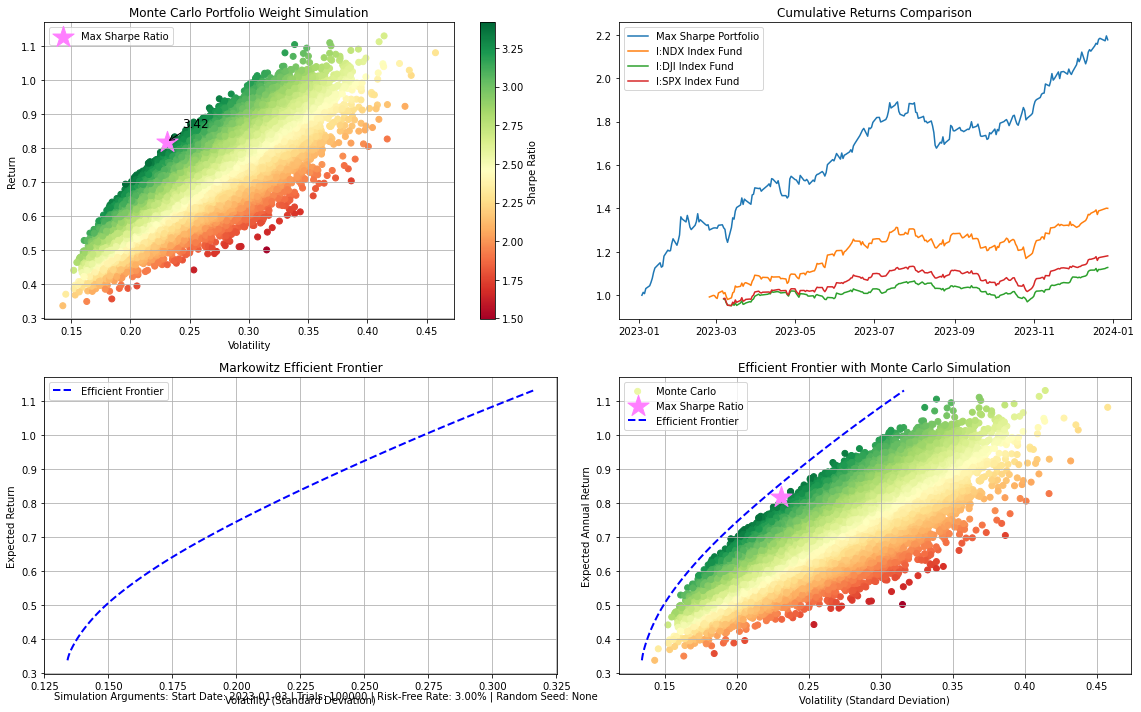

In [8]:
main()